# **🐶🐱 Dog vs Cat Classifier using Transfer Learning**

### **Extracting Dataset using Kaggle API**

In [2]:
# installing the Kaggle library
!pip install kaggle

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

### **Importing the Dog vs Cat Dataset from Kaggle**

In [4]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

 95% 769M/812M [00:04<00:00, 123MB/s]
100% 812M/812M [00:04<00:00, 177MB/s]


In [5]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


### **Printing the name of images**

In [9]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.7476.jpg', 'cat.4386.jpg', 'dog.180.jpg', 'dog.11327.jpg', 'cat.1337.jpg', 'dog.7978.jpg', 'cat.8383.jpg', 'dog.7666.jpg', 'dog.9250.jpg', 'cat.11304.jpg', 'dog.9829.jpg', 'dog.12128.jpg', 'cat.8606.jpg', 'dog.1662.jpg', 'cat.9989.jpg', 'cat.2591.jpg', 'dog.7960.jpg', 'dog.4561.jpg', 'dog.5878.jpg', 'dog.4755.jpg', 'cat.4151.jpg', 'dog.3738.jpg', 'cat.2128.jpg', 'dog.6746.jpg', 'dog.479.jpg', 'dog.8692.jpg', 'dog.11814.jpg', 'dog.6844.jpg', 'dog.548.jpg', 'cat.6567.jpg', 'dog.11078.jpg', 'cat.6222.jpg', 'cat.8486.jpg', 'cat.7560.jpg', 'dog.2895.jpg', 'cat.8146.jpg', 'cat.8898.jpg', 'cat.12078.jpg', 'cat.12183.jpg', 'dog.1204.jpg', 'cat.1738.jpg', 'dog.5658.jpg', 'cat.5509.jpg', 'dog.1734.jpg', 'cat.11425.jpg', 'dog.11342.jpg', 'cat.2648.jpg', 'cat.9994.jpg', 'dog.5609.jpg', 'dog.7566.jpg', 'dog.7989.jpg', 'cat.1077.jpg', 'dog.1091.jpg', 'cat.6509.jpg', 'cat.389.jpg', 'cat.4812.jpg', 'cat.11668.jpg', 'dog.2114.jpg', 'dog.3827.jpg', 'cat.923.jpg', 'cat.6774.jpg', 'cat.10423.jpg', '

### **Importing the Dependencies**

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

### **Displaying the images of dogs and cats**

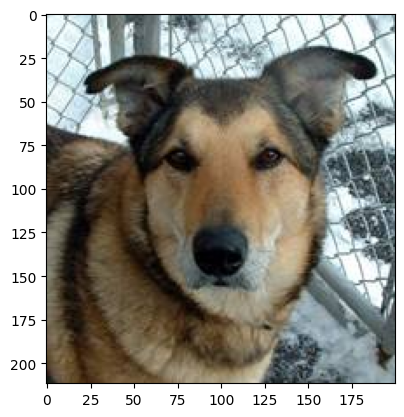

In [67]:
# display dog image
img = mpimg.imread('/content/train/dog.4561.jpg')
imgplt = plt.imshow(img)
plt.show()

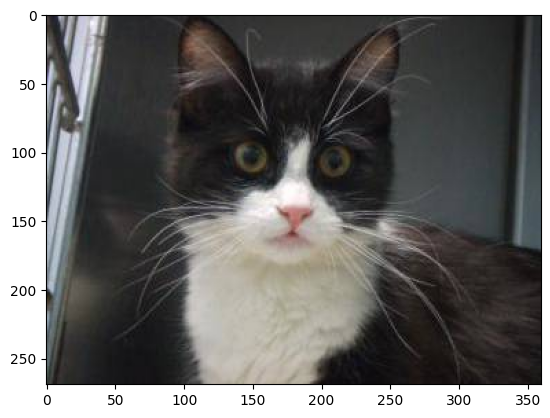

In [39]:
# display cat image
img = mpimg.imread('/content/train/cat.8110.jpg')
imgplt = plt.imshow(img)
plt.show()

In [13]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])



dog
cat
dog
dog
cat


In [14]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


### **Resizing all the images**

In [15]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [16]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

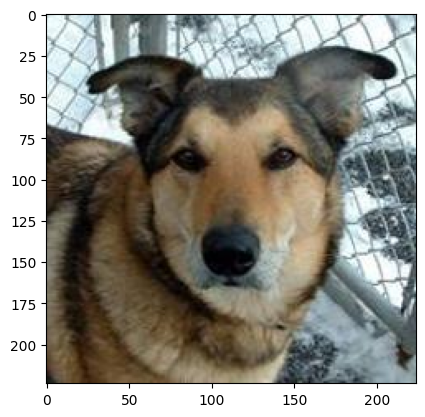

In [66]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.4561.jpg')
imgplt = plt.imshow(img)
plt.show()

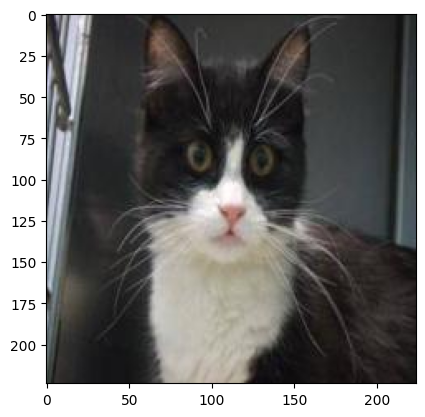

In [41]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.8110.jpg')
imgplt = plt.imshow(img)
plt.show()


### Creating labels for resized images of dogs and cats

Cat --> 0

Dog --> 1

In [19]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [68]:
print(filenames[0:5])
print(len(filenames))

['dog.7476.jpg', 'cat.4386.jpg', 'dog.180.jpg', 'dog.11327.jpg', 'cat.1337.jpg']
2000


In [21]:
print(labels[0:5])
print(len(labels))

[1, 0, 1, 1, 0]
2000


In [22]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1012  988]


### **Converting all the resized images to numpy arrays**

In [23]:
import cv2
import glob

In [24]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [25]:
print(dog_cat_images)

[[[[167 165 171]
   [169 167 173]
   [171 169 175]
   ...
   [232 230 236]
   [225 223 229]
   [220 218 224]]

  [[167 165 171]
   [169 167 173]
   [170 168 174]
   ...
   [227 225 231]
   [223 221 227]
   [237 235 241]]

  [[166 164 170]
   [168 166 172]
   [170 168 174]
   ...
   [231 229 235]
   [228 226 232]
   [242 240 246]]

  ...

  [[108  96  86]
   [125 113 101]
   [132 123 110]
   ...
   [241 239 245]
   [240 236 242]
   [238 234 240]]

  [[136 122 110]
   [161 149 137]
   [155 146 133]
   ...
   [243 243 249]
   [240 238 244]
   [232 230 236]]

  [[150 136 124]
   [185 173 161]
   [175 164 150]
   ...
   [248 248 254]
   [237 235 241]
   [221 219 225]]]


 [[[ 23  58 108]
   [ 23  58 108]
   [ 24  59 109]
   ...
   [  9  44  88]
   [  9  44  88]
   [  9  44  88]]

  [[ 19  54 104]
   [ 20  55 105]
   [ 20  55 105]
   ...
   [ 10  45  89]
   [ 10  45  89]
   [ 10  45  89]]

  [[ 16  50 103]
   [ 16  50 103]
   [ 17  51 104]
   ...
   [ 12  47  91]
   [ 12  47  91]
   [ 12  47

In [26]:
type(dog_cat_images)

numpy.ndarray

In [27]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [28]:
X = dog_cat_images
Y = np.asarray(labels)

### **Train Test Split**

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [31]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [32]:
print(X_train_scaled)

[[[[0.32941176 0.02352941 0.        ]
   [0.35294118 0.08627451 0.05882353]
   [0.18823529 0.00784314 0.        ]
   ...
   [0.06666667 0.01568627 0.00784314]
   [0.12156863 0.         0.        ]
   [0.2        0.04313725 0.04705882]]

  [[0.25098039 0.         0.        ]
   [0.24313725 0.02745098 0.        ]
   [0.21176471 0.0745098  0.05882353]
   ...
   [0.17647059 0.14117647 0.12941176]
   [0.25490196 0.14509804 0.14509804]
   [0.16470588 0.02352941 0.02352941]]

  [[0.23137255 0.0627451  0.05098039]
   [0.19607843 0.07058824 0.05098039]
   [0.40392157 0.35686275 0.34901961]
   ...
   [0.45490196 0.45098039 0.43529412]
   [0.54901961 0.47058824 0.46666667]
   [0.18431373 0.0745098  0.07058824]]

  ...

  [[0.28627451 0.02352941 0.03529412]
   [0.25882353 0.02352941 0.02745098]
   [0.48235294 0.29411765 0.29019608]
   ...
   [0.18823529 0.08235294 0.11764706]
   [0.19607843 0.0627451  0.10196078]
   [0.18039216 0.04705882 0.0745098 ]]

  [[0.31764706 0.02745098 0.04313725]
   [0.2

### Building the Neural Network

In [33]:
import tensorflow as tf
import tensorflow_hub as hub

In [47]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

In [49]:
num_of_classes = 2

# Define a custom Keras Layer to wrap the hub.KerasLayer
class HubLayer(tf.keras.layers.Layer):
    def __init__(self, hub_module, **kwargs):
        super().__init__(**kwargs)
        self.hub_layer = hub.KerasLayer(hub_module, trainable=False)

    def call(self, inputs):
        return self.hub_layer(inputs)

model = tf.keras.Sequential([
    tf.keras.Input(shape=(224, 224, 3)),
    HubLayer(mobilenet_model),  # Use the custom HubLayer
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hub_layer (HubLayer)            │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,562 (10.01 KB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [51]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - acc: 0.8338 - loss: 0.3533
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - acc: 0.9725 - loss: 0.0694
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - acc: 0.9773 - loss: 0.0641
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - acc: 0.9892 - loss: 0.0446
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - acc: 0.9920 - loss: 0.0357


In [52]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - acc: 0.9845 - loss: 0.0384
Test Loss = 0.038289498537778854
Test Accuracy = 0.9825000166893005


### **Predictive System**

Path of the image to be predicted: /content/dog.jpg


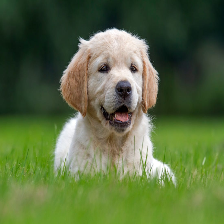

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[[-3.9170313  4.364713 ]]
1
The image represents a Dog


In [55]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

input_image_resize = cv2.resize(input_image, (224,224))

cv2_imshow(input_image_resize)

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat.jpg


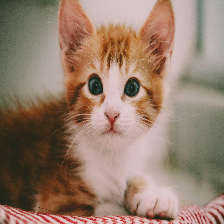

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[[ 5.199279  -3.9738111]]
0
The image represents a Cat


In [56]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)



input_image_resize = cv2.resize(input_image, (224,224))

cv2_imshow(input_image_resize)

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

This project uses Transfer Learning with MobileNetV2 to classify images as dogs or cats. It leverages the Kaggle Dogs vs Cats dataset, resizes and labels 2000 images, and trains a lightweight neural network on top of pretrained features. The model achieves high accuracy and can make predictions on custom images.

Thank You !